# Intelligent World Informatics LectureV: Assignment Week 12
- Author: Paul Lödige (ploedige@g.ecc.u-tokyo.ac.jp)
- Student ID: 37-229753

## Assignment
- Define your own project
  - Describe the task and the goal you would like to achieve
  - Experiment on any public dataset provided by Tensorflow:
    - Full list: https://www.tensorflow.org/datasets/catalog/overview
    - Simple datasets: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
  - Do one of the followings:
    1. Apply two different deep learning techniques you learned from this class
       - e.g.: Comparing Dense DNN vs RNN method on the same dataset (what pros and cons?)
       - e.g.: Combining CNN and RNN on a dataset (why the combination is preferable?)
    2. Apply transfer learning with two different base models
       - Explain the reasons why the base models are reasonable choices.
       - Survey on the internet with keywords such as “best model for imagenet/cifar10/mnist”, “tensorflow pre-trained models”, etc, to find the name of the model
       - Download the base model through tensorflow
         - Just like in the code, simply change the name of the base model. List of available base models in Tensorflow:
           - https://www.tensorflow.org/api_docs/python/tf/keras/applications
         - Add layers, dropouts, use different learning rate, epoch, batch_size, etc.

### Additional Details
- Write 1 ~ 2 page(s) (excluding the code) describing your project:
  - Imagine the project as a kind of “mini research paper”
  - What is the problem? What is your motivation?
  - How are you solving them? What deep learning algorithms?
  - Outline the experiment and test on the dataset.
  - What are the results?
    - Add at least 1 figure and insert your analysis
  - Attach the code at the end.
  - Include your name, affiliation, student number, as well as your university e-mail address in case if we need to contact you for clarification
  - Put all the above in a single PDF and upload to ITC-LMS

### How the project is graded
- The purpose of the project is to make you familiar with machine learning experiments.
  - Not intended to be a stressful project.
    - So do not worry too much on achieving high accuracy, good parameter settings, etc
    - Make sure to keep it simple
- What we would like to see:
  - Clarity of the project description
  - Relevance between the problem and the chosen approaches
  - Appropriate input/output design and execution of the experiments
  - Proper evaluation methods, figures and tables
  - Easy to understand writings, informative comments on the code
- Overall grade for this course : 70% homeworks, 30% final project
  - Bonus points for helping each other on slack
    - Feel free to discuss your final project on slack if you have troubles

## Code
### Import libraries

In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, applications, optimizers
import tensorflow_datasets as tfds
import tkinter.messagebox # for notifications

#### Load Dataset
https://www.tensorflow.org/datasets/keras_example

In [35]:
# split into training and test data
ds_train, ds_test = tfds.load(
    'svhn_cropped', 
    split=['train', 'test'],
    shuffle_files=True, 
    as_supervised=True
    )

#### Confirm Data

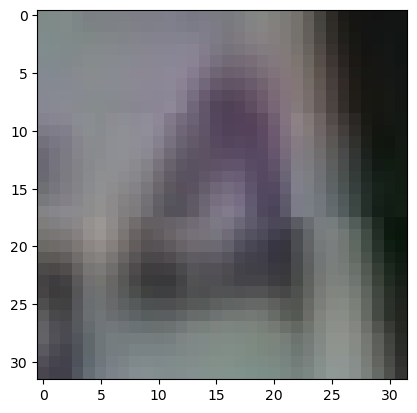

In [36]:
for image, label in ds_train.take(1):
    plt.imshow(image)
    plt.show()

#### Define normalization function

In [37]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

#### Build a training pipeline

In [38]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

#### Build an evaluation pipeline

In [39]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

#### Configurations
The following is a list of the neural network configurations that will be compared:

In [40]:
configs = {}

In [41]:
configs['regular Neural Network (3 hidden layers)'] = {
        'model': models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 30,
        'batch_size': 64
    }

In [42]:
configs['regular Neural Network (5 hidden layers)'] = {
        'model': models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 30,
        'batch_size': 64
    }

In [43]:
configs['regular Neural Network (10 hidden layers)'] = {
        'model': models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 30,
        'batch_size': 64
    }

In [44]:
configs['convolutional neural network (1 convolution)'] = {
        'model': models.Sequential([
            layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 10,
        'batch_size': 64
    }

In [52]:
configs['convolutional neural network (3 convolutions)'] = {
        'model': models.Sequential([
            layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(128, (3,3), activation='relu'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 30,
        'batch_size': 128
    }

In [46]:
densenet121_base_model = applications.DenseNet121(input_shape=(32,32,3), include_top=False, weights='imagenet')
# activate only the last 20 layers for training
densenet121_base_model.trainable = False
for layer in densenet121_base_model.layers[-20:]:
    layer.trainable = True

configs['with DenseNet121 base model'] = {
        'model': models.Sequential([
            densenet121_base_model,
            layers.Flatten(),
            layers.Dense(1024, activation='relu'),
            layers.Dropout(0.1),
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(512, activation='relu'),
            layers.Dense(10, activation='softmax'),
        ]),
        'optimizer': optimizers.Adam(learning_rate=0.0001),
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 20,
        'batch_size': 128
    }

In [47]:
vgg16_base_model = applications.VGG16(input_shape=(32,32,3), include_top= False)
# activate only the last 6 layers for training
vgg16_base_model.trainable = False
for layer in vgg16_base_model.layers[-6:]:
    layer.trainable = True

configs['with VGG16 base model'] = {
        'model': models.Sequential([
            vgg16_base_model,
            layers.Flatten(),
            layers.Dense(1024, activation='relu'),
            layers.Dropout(0.1),
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(512, activation='relu'),
            layers.Dense(10, activation='softmax'),
        ]),
        'optimizer': optimizers.Adam(learning_rate=0.001),
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 128
    }

#### Compile the Models

In [53]:
for config in configs.values():
    if 'history' not in config.keys():
        config['model'].compile(
            optimizer=config['optimizer'],
            loss=config['loss'],
            metrics=config['metrics']
        )

#### Train and Evaluate the Models

In [54]:
try:
    for config_name, config in configs.items():
        if 'history' in config.keys():
            print(f'Already trained model "{config_name}"')
        else:
            print(f'Now training model "{config_name}"')
            config['history'] = config['model'].fit(ds_train, epochs=config['epochs'], validation_data=ds_test, batch_size=config['batch_size'])#, verbose=0)
except Exception as e:
    print(e)
    tkinter.messagebox.showerror("ERROR", f"ERROR: {e}")

Already trained model "regular Neural Network (3 hidden layers)"
Already trained model "regular Neural Network (5 hidden layers)"
Already trained model "regular Neural Network (10 hidden layers)"
Already trained model "convolutional neural network (1 convolution)"
Now training model "convolutional neural network (3 convolutions)"
Epoch 1/30
573/573 [==============================] - 44s 75ms/step - loss: 1.2724 - accuracy: 0.5829 - val_loss: 0.7224 - val_accuracy: 0.7973
Epoch 2/30
573/573 [==============================] - 42s 73ms/step - loss: 0.5971 - accuracy: 0.8280 - val_loss: 0.6116 - val_accuracy: 0.8272
Epoch 3/30
573/573 [==============================] - 43s 76ms/step - loss: 0.4751 - accuracy: 0.8613 - val_loss: 0.5721 - val_accuracy: 0.8365
Epoch 4/30
573/573 [==============================] - 41s 71ms/step - loss: 0.4117 - accuracy: 0.8789 - val_loss: 0.4737 - val_accuracy: 0.8675
Epoch 5/30
573/573 [==============================] - 37s 65ms/step - loss: 0.3686 - accurac

#### Plot the accuracy

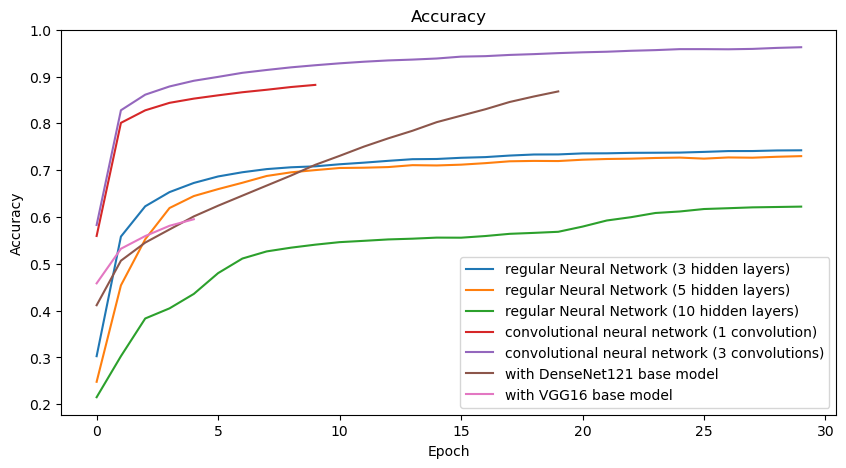

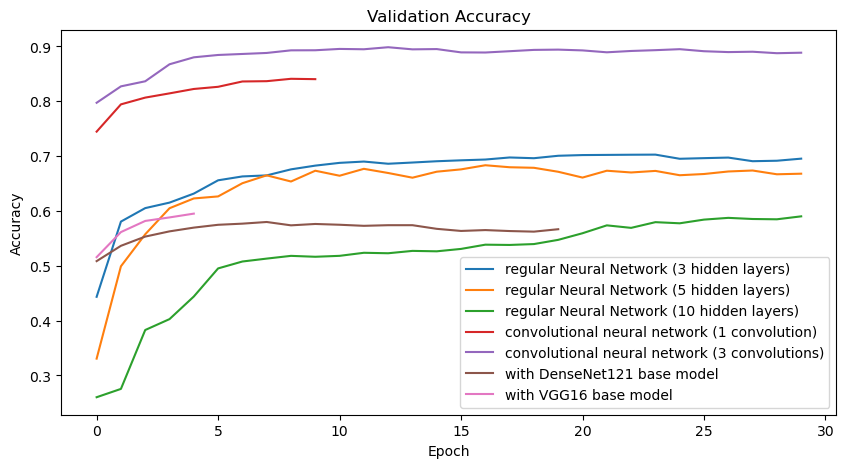

In [55]:
plt.figure(figsize=(10,5))
for config_name, config in configs.items():
    plt.plot(config['history'].history['accuracy'], label=config_name)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.title("Accuracy")
plt.show()

plt.figure(figsize=(10,5))
for config_name, config in configs.items():
    plt.plot(config['history'].history['val_accuracy'], label=config_name)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title("Validation Accuracy")
plt.show()

### Notify when done

In [56]:
tkinter.messagebox.showinfo("DONE", "DONE")

'ok'